# Лабораторная работа №7 “Метод главных компонент”

### *Набор данных **ex7data1.mat** представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X<sub>1</sub> и X<sub>2</sub> - координаты точек, для которых необходимо выделить главные компоненты.*
### *Набор данных **ex7faces.mat** представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит 5000 изображений 32x32 в оттенках серого. Каждый пиксель представляет собой значение яркости (вещественное число). Каждое изображение сохранено в виде вектора из 1024 элементов. В результате загрузки набора данных должна быть получена матрица 5000x1024.*

## **Задание**

### 1. Загрузите данные **ex7data1.mat** из файла.

In [20]:
import math

import pandas as pd
import numpy as np

from scipy import io
from scipy import linalg

import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
ex7data1 = io.loadmat('Data/Lab 7/ex7data1.mat')
X = ex7data1['X']

### 2. Постройте график загруженного набора данных.

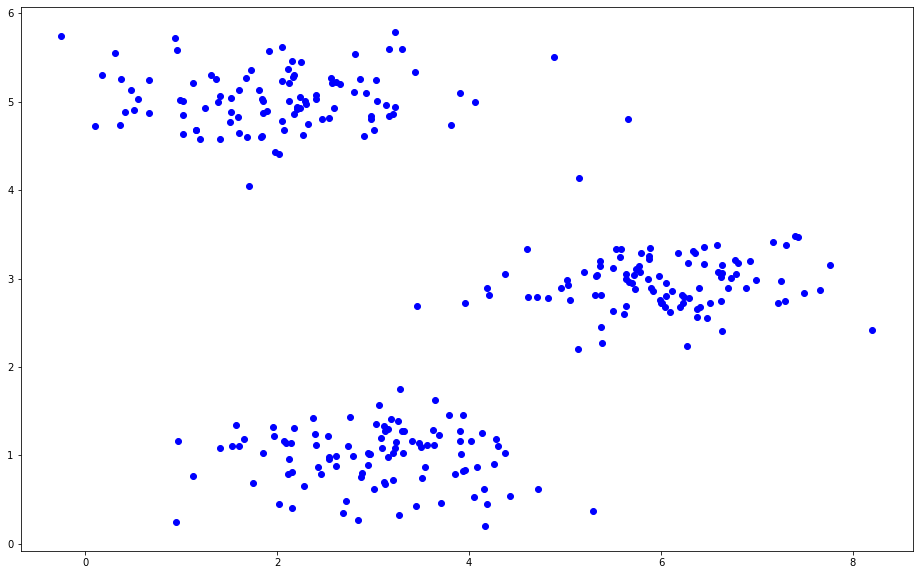

In [22]:
plt.figure(figsize=(16,10))
plt.scatter(X[:,0], X[:,1], color='b')

### 3. Реализуйте функцию вычисления матрицы ковариации данных.

In [23]:
def get_covariance_matrix(A):                                                                                                        
    return (1.0/A.shape[0]) * (A.T).dot(A)

### 4. Вычислите координаты собственных векторов для набора данных с помощью сингулярного разложения матрицы ковариации (разрешается использовать библиотечные реализации матричных разложений).

In [25]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    sigma = np.std(X_norm, axis=0)

    X_norm = X_norm/sigma
    
    return X_norm, mu, sigma

X_norm, mu, sigma = feature_normalize(X)

C = get_covariance_matrix(X_norm)
U, S, Vh = linalg.svd(C)
print('собственные вектора: \n', U)

собственные вектора: 
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


### 5. Постройте на графике из пункта 2 собственные векторы матрицы ковариации.

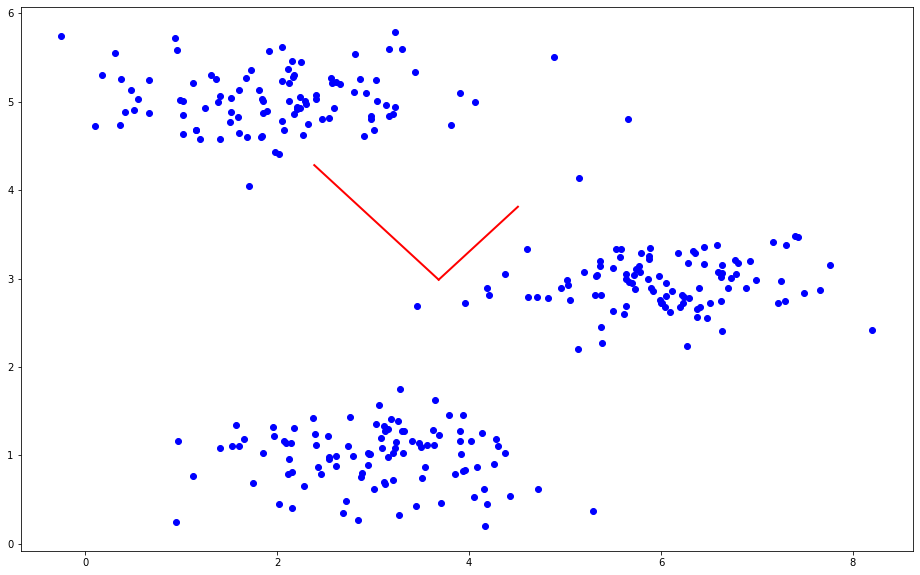

In [26]:
def draw_line(p1, p2, **kwargs):
    plt.plot(np.array([p1[0], p2[0]]), np.array([p1[1], p2[1]]), **kwargs)

plt.figure(figsize=(16,10))
plt.scatter(X[:,0], X[:,1], color='b')
draw_line(mu, mu + 1.5 * S[0] * U[:, 0], c='red', linewidth=2)
draw_line(mu, mu + 1.5 * S[1] * U[:, 1], c='red', linewidth=2)

### 6. Реализуйте функцию проекции из пространства большей размерности в пространство меньшей размерности с помощью метода главных компонент.

In [27]:
def project_data(X, U, K):
    Z = np.zeros((X.shape[0], K))
    
    U_reduce = U[:,:K]
    Z = X.dot(U_reduce)

    return Z

Z = project_data(X_norm, U, 1)
print('projected, original: \n')
for i, j in zip(Z, X_norm[:5]):
    print(i, ',', j)

projected, original: 

[1.3587863] , [-0.95834799  0.96326603]
[0.03582464] , [1.02696731 1.07763101]
[-0.85377231] , [1.38797849 0.18056211]
[0.97011969] , [-0.40593667  0.96601976]
[0.98722254] , [-0.23533308  1.16081042]


### 7. Реализуйте функцию вычисления обратного преобразования.

In [29]:
def recover_data(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    U_reduce = U[:,:K]
    X_rec = Z.dot(U_reduce.T)

    return X_rec

X_rec = recover_data(Z, U, 1)

print('recovered, original: \n')
for i, j in zip(X_rec[:5], X_norm[:5]):
    print(i, ',', j)

recovered, original: 

[-0.96080701  0.96080701] , [-0.95834799  0.96326603]
[-0.02533185  0.02533185] , [1.02696731 1.07763101]
[ 0.60370819 -0.60370819] , [1.38797849 0.18056211]
[-0.68597821  0.68597821] , [-0.40593667  0.96601976]
[-0.69807175  0.69807175] , [-0.23533308  1.16081042]


### 8. Постройте график исходных точек и их проекций на пространство меньшей размерности (с линиями проекций).

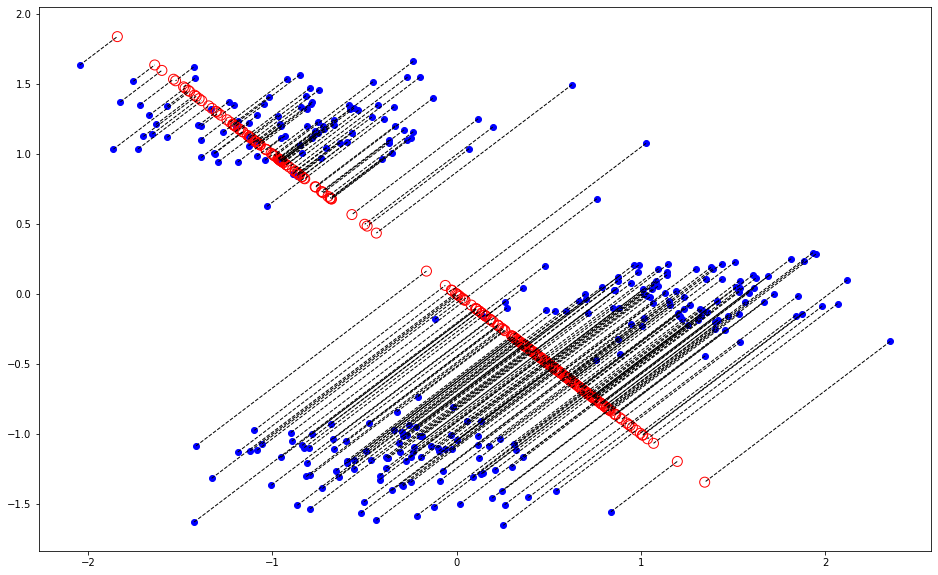

In [31]:
plt.figure(figsize=(16,10))

plt.scatter(X_norm[:,0], X_norm[:,1], color='b')
plt.scatter(X_rec[:, 0], X_rec[:, 1], s=100, facecolors='none', edgecolors='r')
for i in range(X_norm.shape[0]):
    draw_line(X_norm[i,:], X_rec[i,:], linestyle='--', color='k', linewidth=1)

### 9. Загрузите данные **ex7faces.mat** из файла.

In [32]:
ex7faces = io.loadmat('Data/Lab 7/ex7faces.mat')
X = ex7faces['X']

### 10. Визуализируйте 100 случайных изображений из набора данных.

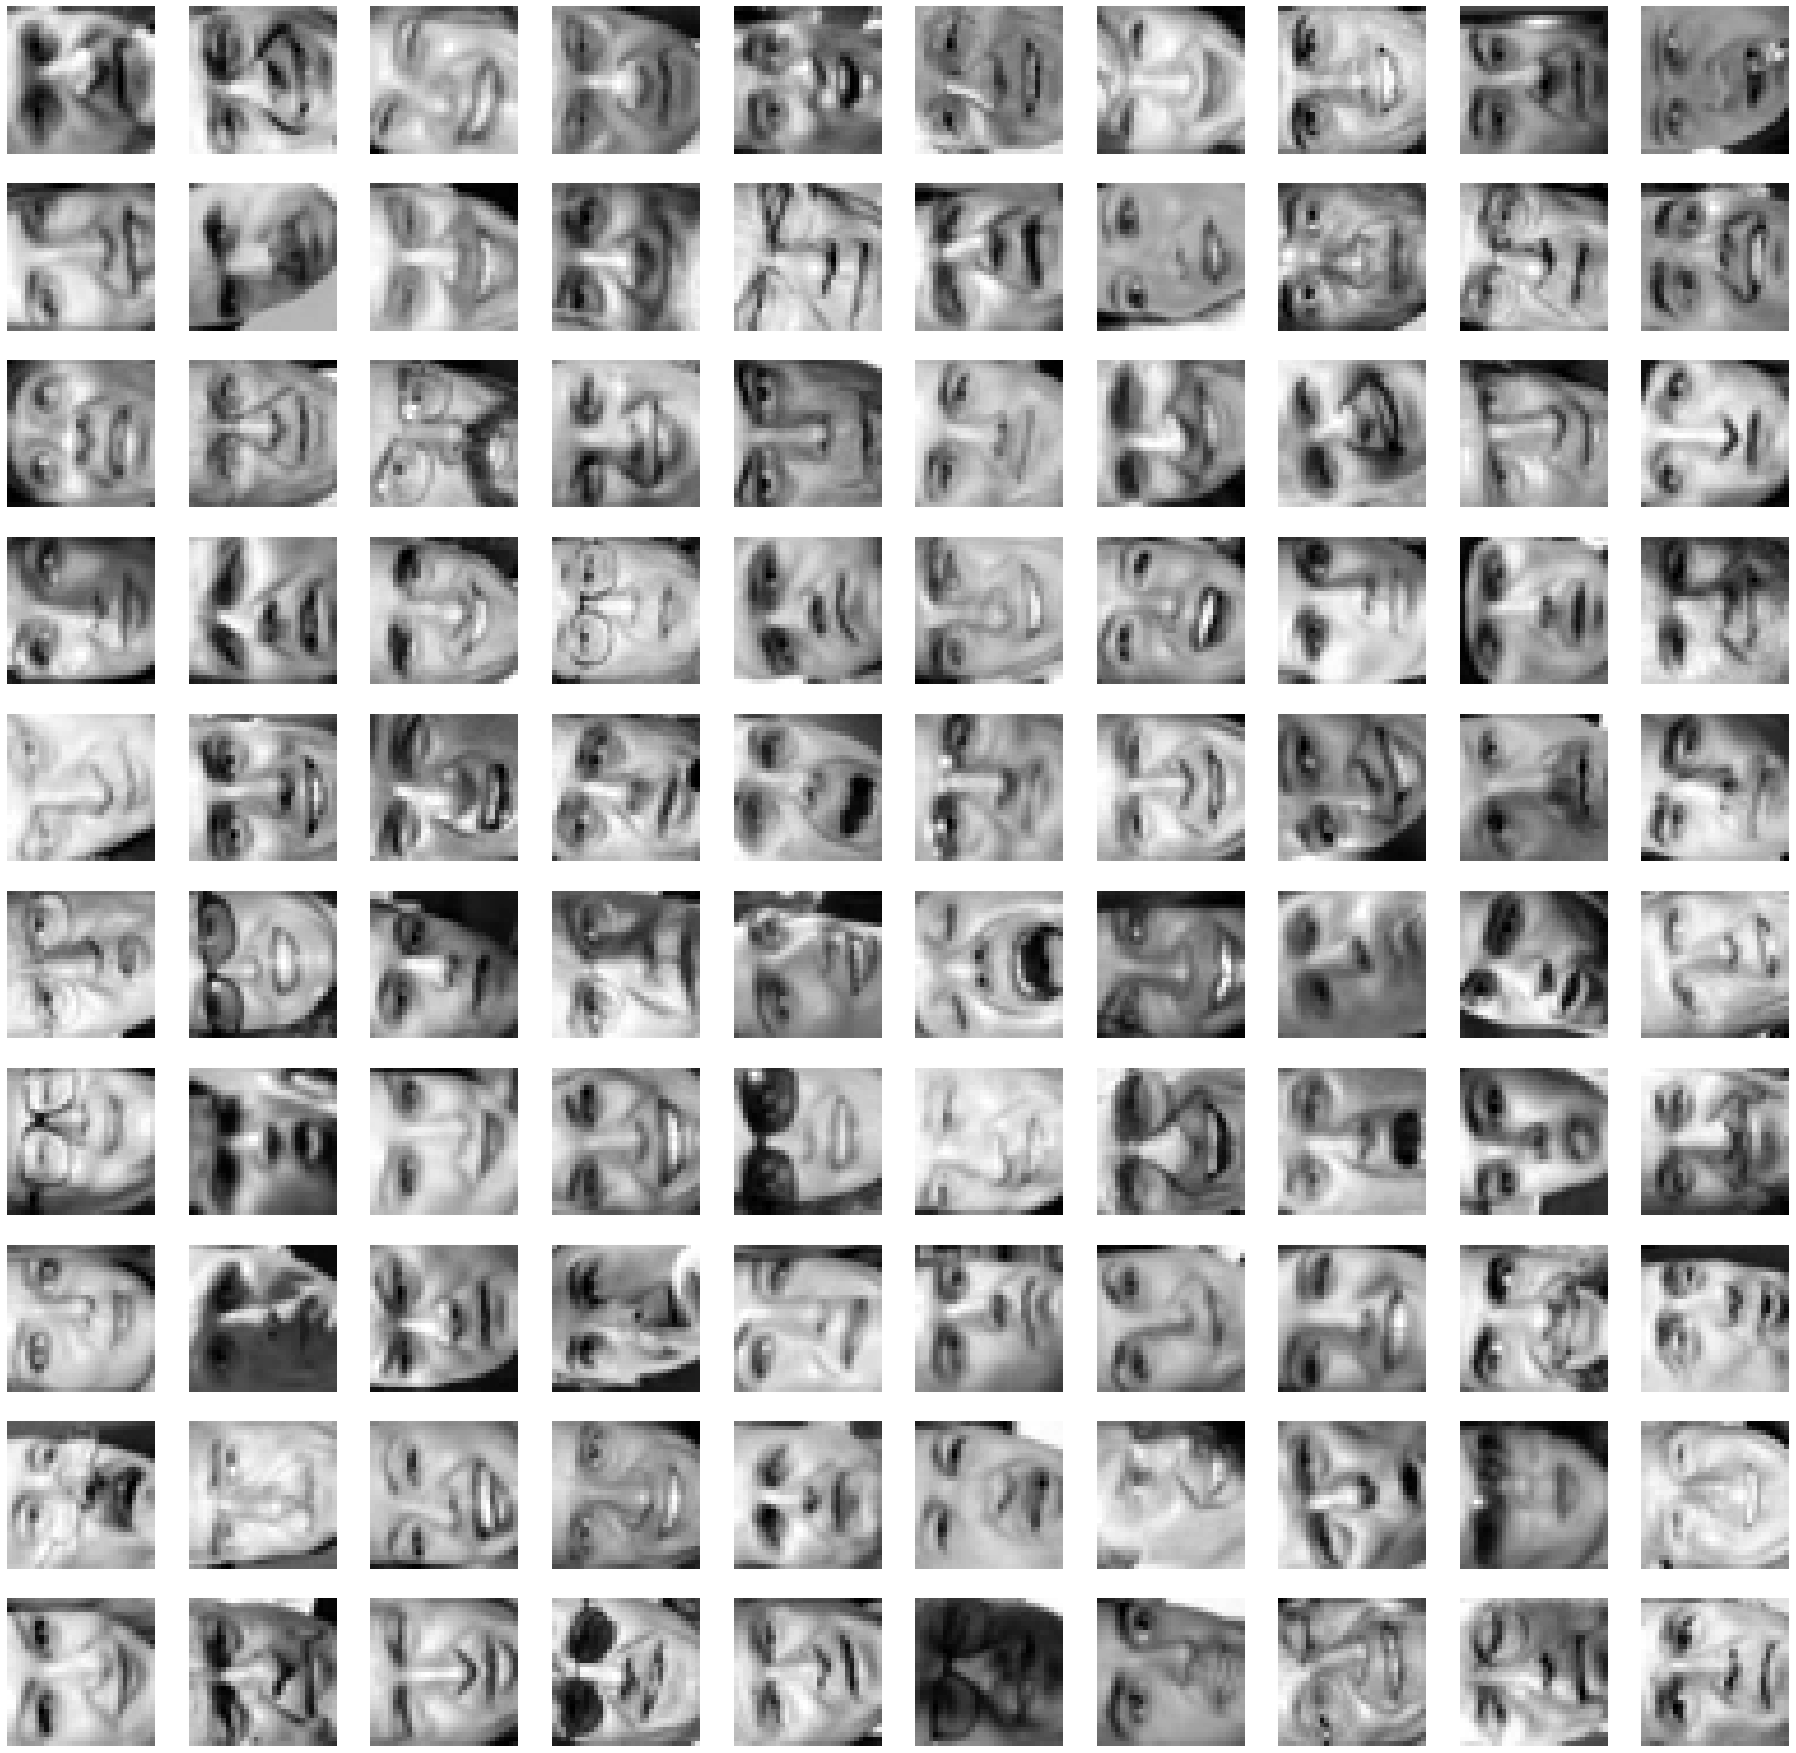

In [33]:
def show_images(X, img_size=32):
    img_in_row = 10
    img_in_col = int(100 / img_in_row)
    f, axarr = plt.subplots(img_in_col, img_in_row, 
                            figsize=(32,32))
    row_ind = -1

    for i, ind in enumerate(np.random.randint(len(X), size=100)):
        if i % img_in_row == 0:
            row_ind += 1

        col_ind = i - row_ind * img_in_row

        axarr[row_ind, col_ind].imshow(X[ind].reshape(img_size,img_size), cmap='gray')
        axarr[row_ind, col_ind].axis('off')
    
show_images(X)

### 11. С помощью метода главных компонент вычислите собственные векторы.

In [34]:
X_norm, mu, sigma = feature_normalize(X)

C = get_covariance_matrix(X_norm)
U, S, Vh = linalg.svd(C)
print('собственные векторы: \n', U)

собственные векторы: 
 [[-0.01425307 -0.03606596 -0.04561884 ...  0.00521903  0.00091143
   0.00077515]
 [-0.01474233 -0.03809858 -0.04756249 ... -0.01142763 -0.00228691
  -0.00434598]
 [-0.01501482 -0.03988747 -0.05082085 ...  0.01843345  0.00554132
   0.00873415]
 ...
 [-0.00895052  0.03119618 -0.05691806 ...  0.0011493   0.00452914
  -0.01218846]
 [-0.00769526  0.0290752  -0.05579144 ... -0.00103011 -0.00647834
   0.00752741]
 [-0.00692969  0.02725819 -0.05339471 ...  0.00266801  0.00543461
  -0.00218828]]


### 12. Визуализируйте 36 главных компонент с наибольшей дисперсией.

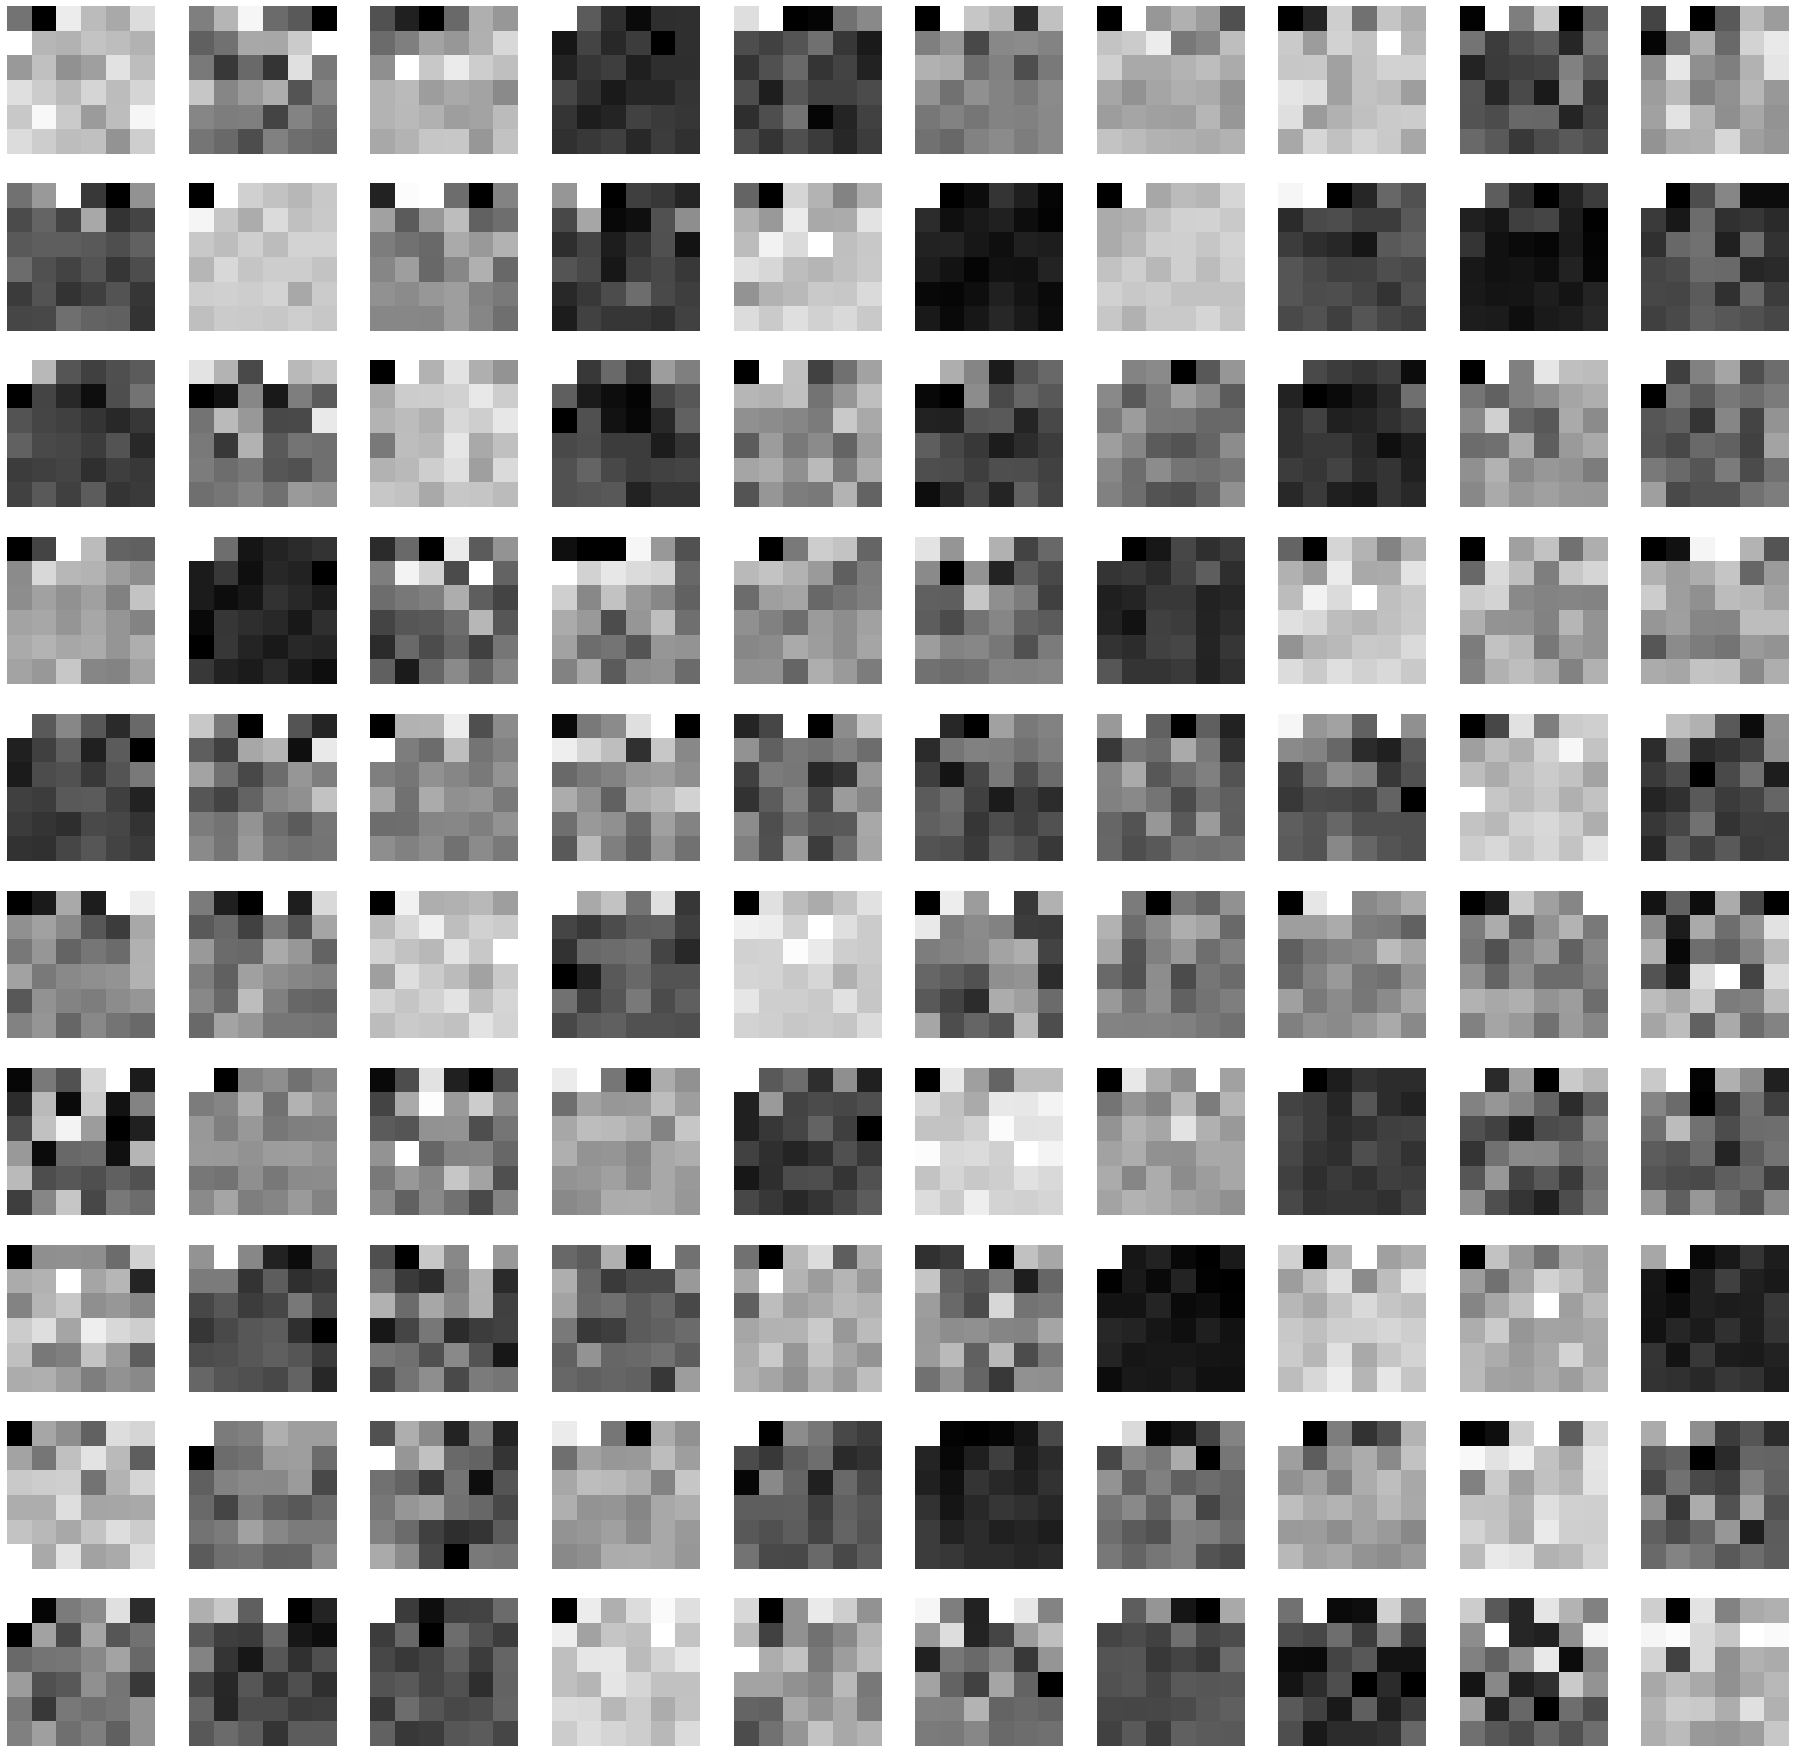

In [35]:
Z_36 = project_data(X_norm, U, 36)
show_images(Z_36, 6)

### 13.Как изменилось качество выбранных изображений?

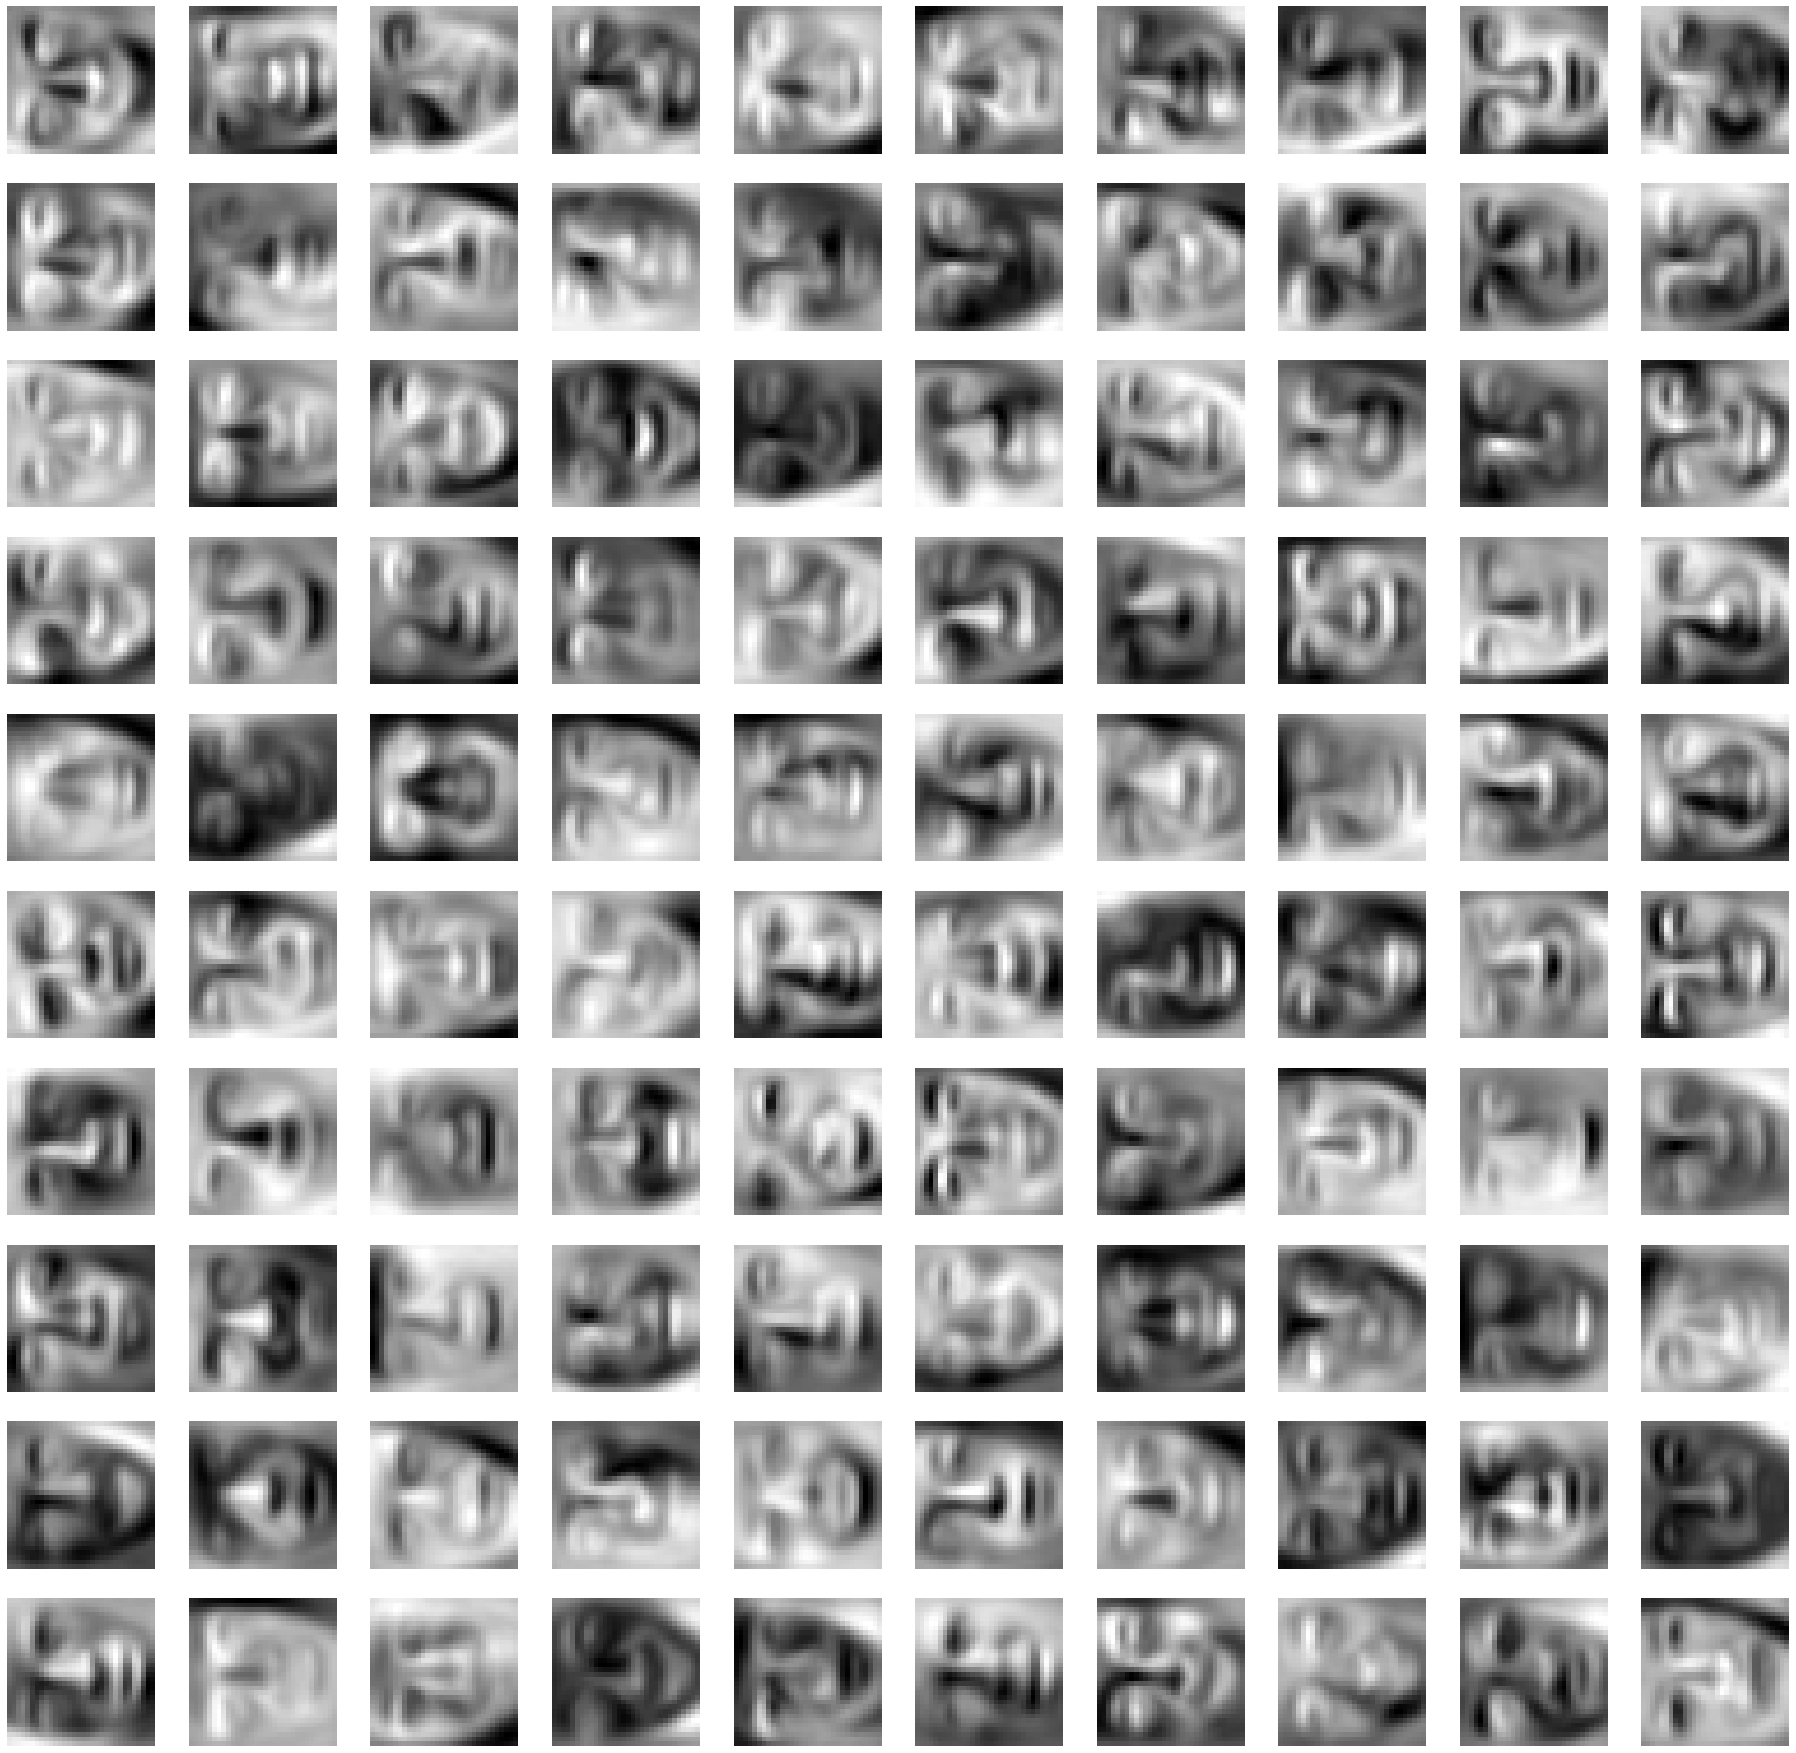

In [36]:
R_36 = recover_data(Z_36, U, 36)
show_images(R_36, 32)

Изображения стали менее четкими, но лица просматриваются.

### 14. Визуализируйте 100 главных компонент с наибольшей дисперсией.

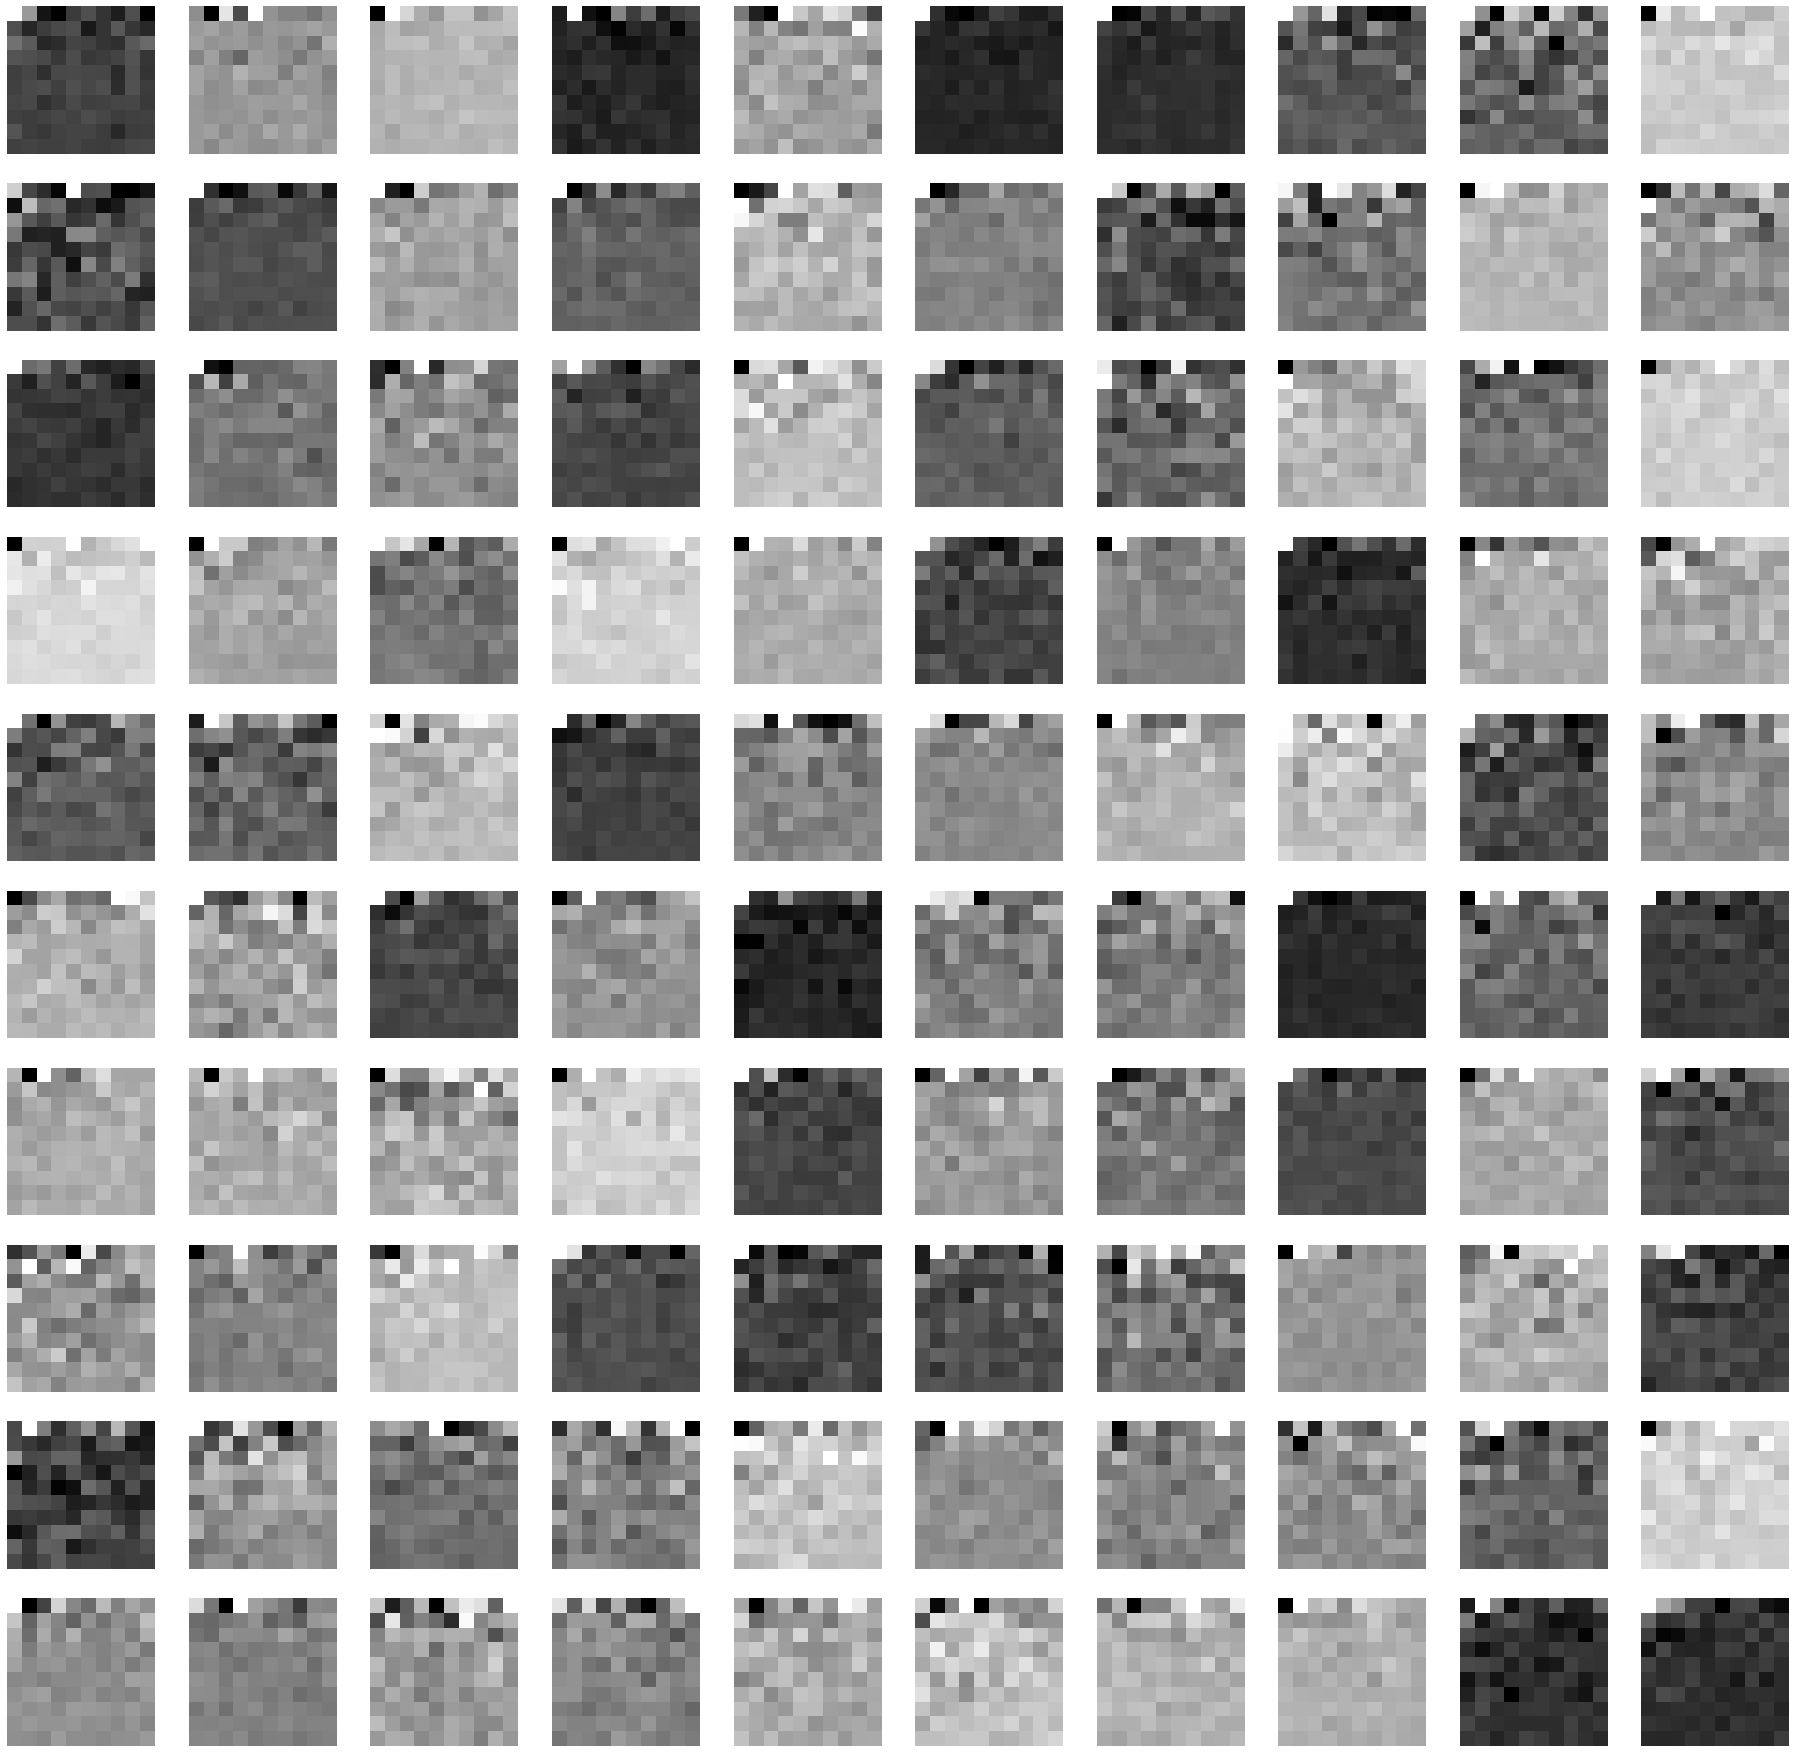

In [38]:
Z_100 = project_data(X_norm, U, 100)
show_images(Z_100, 10)

### 15. Как изменилось качество выбранных изображений?

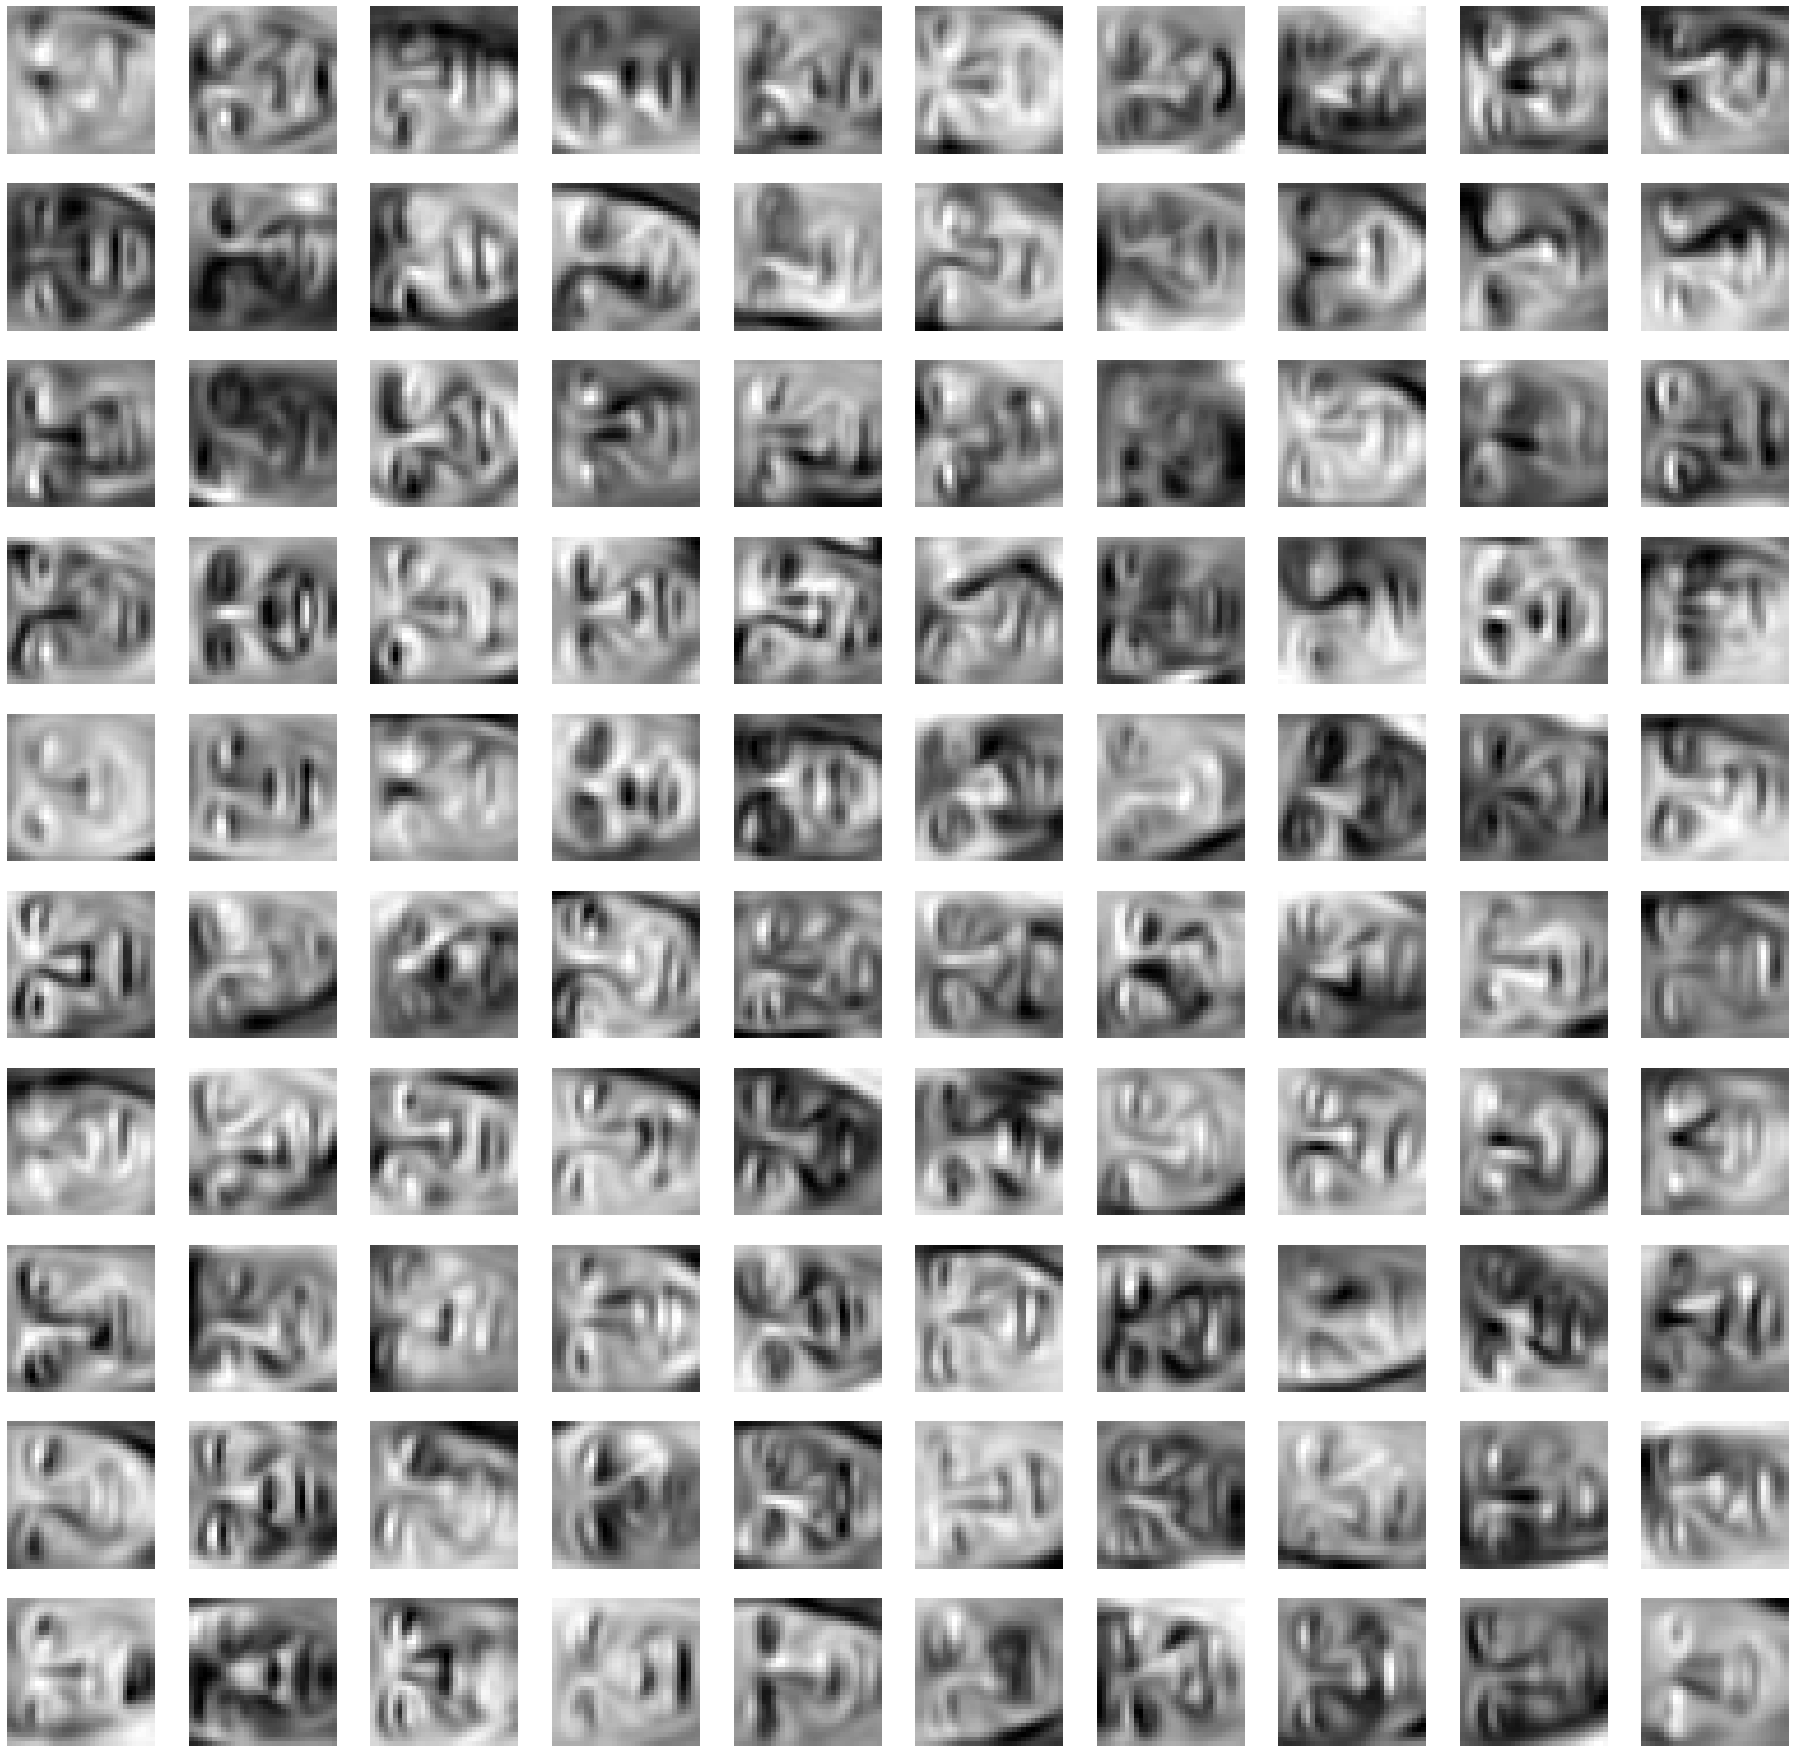

In [39]:
R_100 = recover_data(Z_100, U, 100)
show_images(R_100, 32)

Изображения более четкие по сравнению с предыдущим пунктом, но все еще хуже оригиналов. Однако видно, что понижение размерности выполняет свои функции.